In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier


warnings.filterwarnings('ignore')
# set the seed to 0 for reproducibility 
np.random.seed(0)

### Importing Data and Analyzing the inputs

In [ ]:
df = pd.read_csv("./input/train.csv")
df.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


In [ ]:
df.shape

(28322, 36)

In [ ]:
df.describe()

,s13,s48,s56,s57,s59,n1,n2,n3,n4,n5,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
count,28322.000000,28322.000000,0.0,0.0,0.0,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,...,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000
mean,0.983123,0.433338,NaN,NaN,NaN,10.201863,1.600111,4.805099,5.080537,-32.641183,...,-9.107429,1.612428,5.232644,6.115109,1.699553,0.009992,0.089506,0.497570,2.997740,0.168067
std,0.128814,0.495545,NaN,NaN,NaN,4.414660,0.664985,2.199282,2.276162,0.241453,...,0.205200,0.173560,2.179705,2.474138,0.115150,0.099462,0.285478,0.289207,2.007611,0.373933
min,0.000000,0.000000,NaN,NaN,NaN,2.200736,0.311727,0.000000,1.700370,-33.167589,...,-9.517986,1.178469,2.508858,1.173465,1.500006,0.000000,0.000000,0.000101,0.000000,0.000000
25%,1.000000,0.000000,NaN,NaN,NaN,6.592127,1.013540,3.000000,2.833161,-32.862207,...,-9.258473,1.489924,3.464229,4.414671,1.600056,0.000000,0.000000,0.247801,1.000000,0.000000
50%,1.000000,0.000000,NaN,NaN,NaN,9.535961,1.462197,5.000000,4.840320,-32.577026,...,-9.174557,1.537263,4.461770,5.317154,1.698556,0.000000,0.000000,0.495255,3.000000,0.000000
75%,1.000000,1.000000,NaN,NaN,NaN,14.432580,2.194510,6.000000,7.300738,-32.396733,...,-8.964786,1.730249,6.524341,7.027610,1.799238,0.000000,0.000000,0.748786,5.000000,0.000000
max,1.000000,1.000000,NaN,NaN,NaN,20.882733,3.137331,9.000000,8.594620,-32.289180,...,-8.586583,2.173593,11.214870,12.029135,1.899995,1.000000,1.000000,0.999990,6.000000,1.000000


In [ ]:
df.tail()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
28317,b'gAAAAABinOiX2ss5U2ZT5zFd8zf7HcBDWPvbivNz5wAy...,M,Y,Y,1,D,D,B,0,1,...,-8.651173,1.877460,3.637551,11.404942,1.862441,0,0,0.019793,5,0
28318,b'gAAAAABinOiabmEADrCTZQktCKiahJkR_0kDa_8WOlos...,M,Y,Y,1,D,D,B,0,1,...,-8.833046,1.559138,4.247487,5.530054,1.671527,0,0,0.371074,2,0
28319,b'gAAAAABinOicscC37w1W9uiIlYL1U5D_mUtmgdUg8QTl...,F,Y,Y,1,D,D,B,0,1,...,-9.233722,1.455911,2.900249,6.058681,1.627479,0,1,0.826587,1,0
28320,b'gAAAAABinOib-JZ8iQDxjSRsa1dPT1TqeSQ_si4mAw5f...,M,Y,Y,1,B,C,B,1,1,...,-8.748941,2.074394,10.673259,11.387646,1.560391,0,0,0.103523,5,0
28321,b'gAAAAABinOiZ3mCQAtoJFXj-Ymjhi9FbbZ_Ypi5gDoAE...,M,Y,Y,1,D,D,B,1,l,...,-9.280950,1.490478,3.569598,4.584967,1.777995,0,1,0.435079,5,0


In [ ]:
df.corr()

,s13,s48,s56,s57,s59,n1,n2,n3,n4,n5,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
s13,1.000000,-0.107237,NaN,NaN,NaN,-0.059313,-0.059919,0.055319,0.012209,-0.090193,...,0.044618,-0.064532,-0.029764,0.035100,0.014183,0.002139,-0.006929,0.000816,-0.003288,-0.209406
s48,-0.107237,1.000000,NaN,NaN,NaN,-0.031168,-0.033586,0.051126,-0.088057,0.007119,...,0.026812,-0.010002,0.092835,0.055772,0.000968,0.003127,0.003117,0.005858,0.008473,0.248349
s56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n1,-0.059313,-0.031168,NaN,NaN,NaN,1.000000,0.855794,0.289057,0.131877,0.166290,...,0.602224,0.662666,0.393686,0.490394,-0.004650,0.003443,0.010118,-0.002616,-0.006759,0.142913
n2,-0.059919,-0.033586,NaN,NaN,NaN,0.855794,1.000000,0.321529,0.154993,0.135346,...,0.624320,0.648843,0.401184,0.525765,-0.006222,-0.001333,0.014115,-0.002258,-0.006553,0.120631
n3,0.055319,0.051126,NaN,NaN,NaN,0.289057,0.321529,1.000000,0.222131,-0.056097,...,0.640050,0.220419,0.395780,0.604656,-0.000420,0.003415,0.002704,-0.006510,-0.005514,-0.123280
n4,0.012209,-0.088057,NaN,NaN,NaN,0.131877,0.154993,0.222131,1.000000,0.050772,...,0.223498,0.058810,0.168241,0.204752,-0.010558,0.000877,0.007066,0.000621,-0.000099,-0.069697
n5,-0.090193,0.007119,NaN,NaN,NaN,0.166290,0.135346,-0.056097,0.050772,1.000000,...,-0.093723,0.105349,0.124063,-0.160737,0.005097,-0.008544,0.001276,-0.014498,0.000468,0.183936


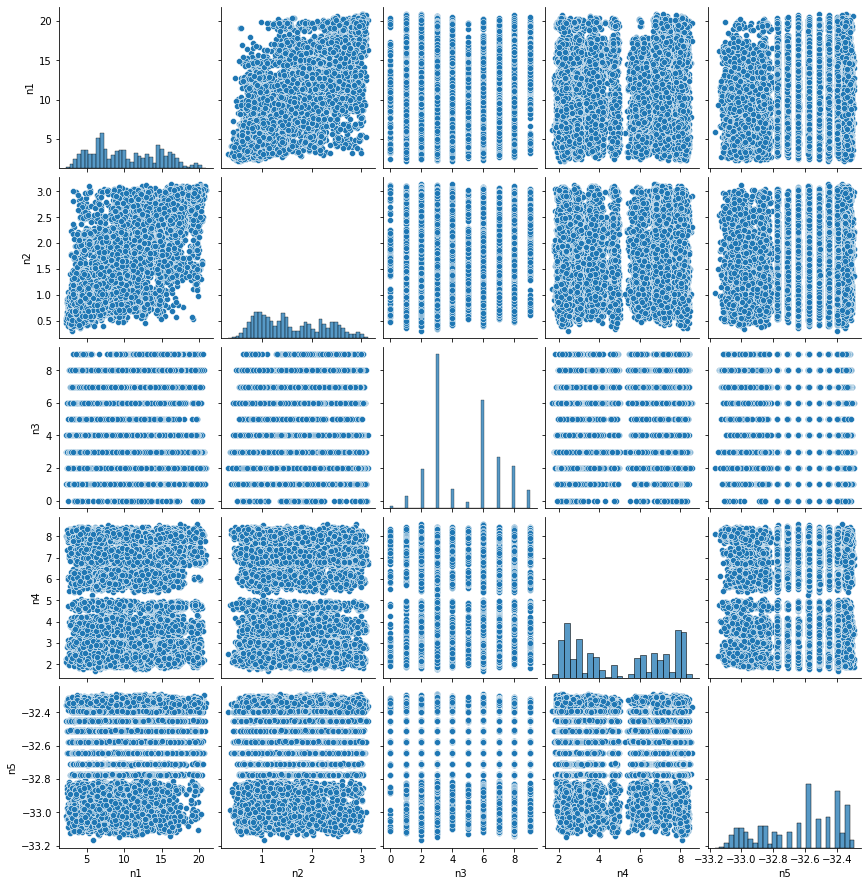

In [ ]:
sns.pairplot(df, vars=['n1', 'n2', 'n3', 'n4', 'n5'])
plt.show()

In [ ]:
df_corr = df[['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11',
       'n12', 'n13', 'n14', 'n15']].dropna().corr()
df_corr

,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
n1,1.000000,0.855794,0.289057,0.131877,0.166290,0.081274,0.602224,0.662666,0.393686,0.490394,-0.004650,0.003443,0.010118,-0.002616,-0.006759
n2,0.855794,1.000000,0.321529,0.154993,0.135346,0.026397,0.624320,0.648843,0.401184,0.525765,-0.006222,-0.001333,0.014115,-0.002258,-0.006553
n3,0.289057,0.321529,1.000000,0.222131,-0.056097,-0.425036,0.640050,0.220419,0.395780,0.604656,-0.000420,0.003415,0.002704,-0.006510,-0.005514
n4,0.131877,0.154993,0.222131,1.000000,0.050772,-0.088265,0.223498,0.058810,0.168241,0.204752,-0.010558,0.000877,0.007066,0.000621,-0.000099
n5,0.166290,0.135346,-0.056097,0.050772,1.000000,0.426532,-0.093723,0.105349,0.124063,-0.160737,0.005097,-0.008544,0.001276,-0.014498,0.000468
n6,0.081274,0.026397,-0.425036,-0.088265,0.426532,1.000000,-0.379512,0.077969,-0.145519,-0.455716,-0.001123,-0.002986,-0.001449,-0.007769,0.005207
n7,0.602224,0.624320,0.640050,0.223498,-0.093723,-0.379512,1.000000,0.500690,0.450283,0.781825,-0.002946,0.001473,0.000887,0.003437,-0.007161
n8,0.662666,0.648843,0.220419,0.058810,0.105349,0.077969,0.500690,1.000000,0.289764,0.400302,-0.002946,0.003862,0.005679,-0.001934,0.001868
n9,0.393686,0.401184,0.395780,0.168241,0.124063,-0.145519,0.450283,0.289764,1.000000,0.457136,-0.012473,-0.007773,0.008989,-0.008778,0.001764
n10,0.490394,0.525765,0.604656,0.204752,-0.160737,-0.455716,0.781825,0.400302,0.457136,1.000000,-0.000092,0.007479,0.009095,0.004541,-0.007330


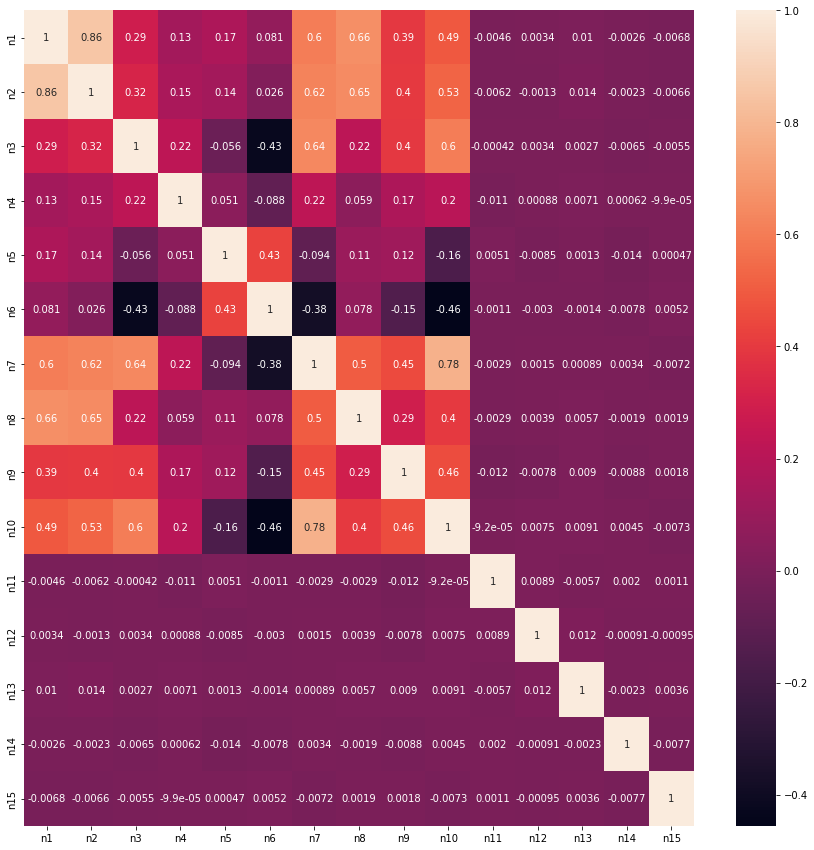

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=True)
plt.show()

In [ ]:
df.columns

Index(['id', 'gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52',
       's53', 's54', 's55', 's56', 's57', 's58', 's59', 's69', 's70', 's71',
       'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11',
       'n12', 'n13', 'n14', 'n15', 'label'],
      dtype='object')

In [ ]:
df.dtypes

id         object
gender     object
s11        object
s12        object
s13         int64
s16        object
s17        object
s18        object
s48         int64
s52        object
s53        object
s54        object
s55        object
s56       float64
s57       float64
s58        object
s59       float64
s69        object
s70        object
s71        object
n1        float64
n2        float64
n3          int64
n4        float64
n5        float64
n6        float64
n7        float64
n8        float64
n9        float64
n10       float64
n11       float64
n12         int64
n13         int64
n14       float64
n15         int64
label       int64
dtype: object

In [ ]:
df['label'].value_counts()

0    23562
1     4760
Name: label, dtype: int64

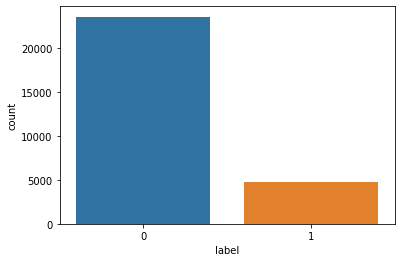

In [ ]:
g = sns.countplot(df['label'])
g.set_xticklabels(['0','1'])
plt.show()

## This is an imbalanced dataset

In [ ]:
label_0 = df[df.label == 0]
label_1 = df[df.label == 1]

In [ ]:
print(label_0.shape, label_1.shape)

(23562, 36) (4760, 36)


In [ ]:
label_0_sample = label_0.sample(n=4760)

In [ ]:
print(label_0_sample.shape)

(4760, 36)


### Concatanating two dataframes

In [ ]:
new_dataset = pd.concat([label_0_sample, label_1], axis=0)

In [ ]:
new_dataset.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
6123,b'gAAAAABinOiW2NLWA2xlvXH3jw-WnoP55lj8a1TcS1dM...,M,Y,Y,1,B,D,B,0,1,...,-8.720295,1.665949,4.806336,8.278018,1.564956,0,1,0.408815,5,0
1593,b'gAAAAABinOiVRlxi86LyyMZIlZnjVbJLyEbl4TQF4RCP...,F,Y,Y,1,D,D,B,0,1,...,-9.244978,1.473734,3.444111,5.606270,1.841928,0,0,0.973202,6,0
20154,b'gAAAAABinOiaBjtwPqHZ7cgMCjlfPEs7NGAepgbSL4Jn...,M,Y,Y,1,B,D,C,0,l,...,-9.164862,1.879548,3.220721,4.668293,1.602795,0,0,0.424295,4,0
13944,b'gAAAAABinOihE-QlpdQJY1ZIz_FOX1xVl6sz2EpdLapZ...,M,Y,Y,1,D,D,B,1,1,...,-9.286495,1.503748,3.431473,4.059819,1.663470,0,0,0.687216,0,0
535,b'gAAAAABinOiXQUIFSEcB2F5qkfEzinHaKpRYRDFIekhG...,M,Y,Y,1,D,D,B,0,1,...,-9.402458,1.375601,5.200256,3.931164,1.628087,0,0,0.341272,6,0


In [ ]:
new_dataset.tail()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
28299,b'gAAAAABinOia1rl8LmRo0Zh96tpWCw6--VaSp-hmi1e_...,M,Y,Y,1,D,D,B,1,l,...,-9.061951,1.812311,6.137290,6.981562,1.529008,0,0,0.511887,4,1
28306,b'gAAAAABinOiWONxRnjomDSnDDEJm2_xWzEktr4DfkLmj...,M,Y,Y,1,D,D,D,0,l,...,-8.747379,1.710269,2.754016,7.086912,1.543778,0,0,0.019765,5,1
28307,b'gAAAAABinOiXCNBhdUSuEVDJSS3aAU-3TqNbSh5aXSmB...,M,Y,Y,1,B,D,B,1,l,...,-9.249728,1.513582,3.273155,4.654128,1.727259,0,0,0.589568,3,1
28308,b'gAAAAABinOiZMiwIvwXJ0YX9UEwL9LcMjfTfkuHEAEeO...,M,Y,Y,1,B,D,B,1,l,...,-9.269047,1.551798,6.045366,5.254935,1.657206,0,0,0.650048,0,1
28311,b'gAAAAABinOiY8Dve398PPxNm7CvfCG0WKdgCfBUvfu1c...,M,Y,Y,1,D,D,B,1,1,...,-9.290685,1.559223,2.830473,2.791370,1.744145,0,0,0.959941,1,1


In [ ]:
new_dataset["label"].value_counts()

0    4760
1    4760
Name: label, dtype: int64

In [ ]:
new_dataset['gender'].replace({'F':1,'M':0},inplace=True)

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [ ]:
print_unique_col_values(new_dataset)

id: ["b'gAAAAABinOiW2NLWA2xlvXH3jw-WnoP55lj8a1TcS1dMt8pr2-GmLZI4_tYimNZMhtPFZRzFqUFgz1zfGmYDYLtWMrDk8zCs8A=='"
 "b'gAAAAABinOiVRlxi86LyyMZIlZnjVbJLyEbl4TQF4RCPC4cveDCLFqSOLQAKA7oMuq7QPp0n0Xujw4Mr36Kd9JqHyYElPIpXIg=='"
 "b'gAAAAABinOiaBjtwPqHZ7cgMCjlfPEs7NGAepgbSL4JnXLLx7vlr_Ih7Mr6G1agl0VJO42NYzwvdhqD5DcdOHfOkwgSG6WNZfg=='"
 ...
 "b'gAAAAABinOiXCNBhdUSuEVDJSS3aAU-3TqNbSh5aXSmBE6e72wQ3StSb02q3wg_gXcXM50grOlp_FLsIRcA0i5ZTZyhor5G0jg=='"
 "b'gAAAAABinOiZMiwIvwXJ0YX9UEwL9LcMjfTfkuHEAEeOOSQiV8T8E6PRXoRioCvvL_S-47a6FTGh_MX25bhcg5kmNFrXy80HkQ=='"
 "b'gAAAAABinOiY8Dve398PPxNm7CvfCG0WKdgCfBUvfu1cyGMo3Y2SOxdC9m7D4nFHmIRO_itkJYxZBVTMJiYMd1BA_8He9w7dbw=='"]
s11: ['Y' 'N']
s12: ['Y' 'N']
s16: ['B' 'D' 'C' 'A']
s17: ['D' 'B' 'A' 'C']
s18: ['B' 'C' 'D' 'A']
s52: ['1' 'l' '0' 'o']
s53: ['  ' ' ']
s54: [nan 'ab' '2b' '2a' 'b2' 'ba' 'a2' 'bb' '22' 'aa']
s55: [nan '2k' 'kk' 'kK' 'k2' '2K' 'KK' 'Kk' '22' 'K2']
s58: ['B' 'A']
s69: ['~1' 'x' 'C`' '0']
s70: ['op: D' 'op: B' 'op: A' 'op: C']
s71: ['b' 'c' 'd' '

In [ ]:
new_dataset.gender.unique()

array([0, 1])

In [ ]:
yes_no_columns = ['s11', 's12', 'label']
for col in yes_no_columns:
    new_dataset[col].replace({'Y': 1,'N': 0},inplace=True)

In [ ]:
for col in new_dataset:
    print(f'{col}: {new_dataset[col].unique()}') 

id: ["b'gAAAAABinOiW2NLWA2xlvXH3jw-WnoP55lj8a1TcS1dMt8pr2-GmLZI4_tYimNZMhtPFZRzFqUFgz1zfGmYDYLtWMrDk8zCs8A=='"
 "b'gAAAAABinOiVRlxi86LyyMZIlZnjVbJLyEbl4TQF4RCPC4cveDCLFqSOLQAKA7oMuq7QPp0n0Xujw4Mr36Kd9JqHyYElPIpXIg=='"
 "b'gAAAAABinOiaBjtwPqHZ7cgMCjlfPEs7NGAepgbSL4JnXLLx7vlr_Ih7Mr6G1agl0VJO42NYzwvdhqD5DcdOHfOkwgSG6WNZfg=='"
 ...
 "b'gAAAAABinOiXCNBhdUSuEVDJSS3aAU-3TqNbSh5aXSmBE6e72wQ3StSb02q3wg_gXcXM50grOlp_FLsIRcA0i5ZTZyhor5G0jg=='"
 "b'gAAAAABinOiZMiwIvwXJ0YX9UEwL9LcMjfTfkuHEAEeOOSQiV8T8E6PRXoRioCvvL_S-47a6FTGh_MX25bhcg5kmNFrXy80HkQ=='"
 "b'gAAAAABinOiY8Dve398PPxNm7CvfCG0WKdgCfBUvfu1cyGMo3Y2SOxdC9m7D4nFHmIRO_itkJYxZBVTMJiYMd1BA_8He9w7dbw=='"]
gender: [0 1]
s11: [1 0]
s12: [1 0]
s13: [1 0]
s16: ['B' 'D' 'C' 'A']
s17: ['D' 'B' 'A' 'C']
s18: ['B' 'C' 'D' 'A']
s48: [0 1]
s52: ['1' 'l' '0' 'o']
s53: ['  ' ' ']
s54: [nan 'ab' '2b' '2a' 'b2' 'ba' 'a2' 'bb' '22' 'aa']
s55: [nan '2k' 'kk' 'kK' 'k2' '2K' 'KK' 'Kk' '22' 'K2']
s56: [nan]
s57: [nan]
s58: ['B' 'A']
s59: [nan]
s69: ['~1' 'x' 'C`' '0

In [ ]:
# s54, s55, s56, s57, s59
new_dataset = new_dataset.drop(['s54', 's55', 's56', 's57', 's59', "s53"], axis=1)

In [ ]:
new_dataset.columns

Index(['id', 'gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52',
       's58', 's69', 's70', 's71', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7',
       'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'label'],
      dtype='object')

In [ ]:
df2 = pd.get_dummies(data=new_dataset, columns=["s16","s17",'s58', "s52", "s71", "s69", "s52","s18"])
df2.columns

Index(['id', 'gender', 's11', 's12', 's13', 's48', 's70', 'n1', 'n2', 'n3',
       'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14',
       'n15', 'label', 's16_A', 's16_B', 's16_C', 's16_D', 's17_A', 's17_B',
       's17_C', 's17_D', 's58_A', 's58_B', 's52_0', 's52_1', 's52_l', 's52_o',
       's71_a', 's71_b', 's71_c', 's71_d', 's69_0', 's69_C`', 's69_x',
       's69_~1', 's52_0', 's52_1', 's52_l', 's52_o', 's18_A', 's18_B', 's18_C',
       's18_D'],
      dtype='object')

In [ ]:
df2 = pd.get_dummies(data=df2,columns=["s70"])

In [ ]:
df2.columns

Index(['id', 'gender', 's11', 's12', 's13', 's48', 'n1', 'n2', 'n3', 'n4',
       'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15',
       'label', 's16_A', 's16_B', 's16_C', 's16_D', 's17_A', 's17_B', 's17_C',
       's17_D', 's58_A', 's58_B', 's52_0', 's52_1', 's52_l', 's52_o', 's71_a',
       's71_b', 's71_c', 's71_d', 's69_0', 's69_C`', 's69_x', 's69_~1',
       's52_0', 's52_1', 's52_l', 's52_o', 's18_A', 's18_B', 's18_C', 's18_D',
       's70_op: A', 's70_op: B', 's70_op: C', 's70_op: D'],
      dtype='object')

In [ ]:
df2.dtypes

id            object
gender         int64
s11            int64
s12            int64
s13            int64
s48            int64
n1           float64
n2           float64
n3             int64
n4           float64
n5           float64
n6           float64
n7           float64
n8           float64
n9           float64
n10          float64
n11          float64
n12            int64
n13            int64
n14          float64
n15            int64
label          int64
s16_A          uint8
s16_B          uint8
s16_C          uint8
s16_D          uint8
s17_A          uint8
s17_B          uint8
s17_C          uint8
s17_D          uint8
s58_A          uint8
s58_B          uint8
s52_0          uint8
s52_1          uint8
s52_l          uint8
s52_o          uint8
s71_a          uint8
s71_b          uint8
s71_c          uint8
s71_d          uint8
s69_0          uint8
s69_C`         uint8
s69_x          uint8
s69_~1         uint8
s52_0          uint8
s52_1          uint8
s52_l          uint8
s52_o        

In [ ]:
df2 = df2.drop(['id'], axis=1)

In [ ]:
df2.dtypes

gender         int64
s11            int64
s12            int64
s13            int64
s48            int64
n1           float64
n2           float64
n3             int64
n4           float64
n5           float64
n6           float64
n7           float64
n8           float64
n9           float64
n10          float64
n11          float64
n12            int64
n13            int64
n14          float64
n15            int64
label          int64
s16_A          uint8
s16_B          uint8
s16_C          uint8
s16_D          uint8
s17_A          uint8
s17_B          uint8
s17_C          uint8
s17_D          uint8
s58_A          uint8
s58_B          uint8
s52_0          uint8
s52_1          uint8
s52_l          uint8
s52_o          uint8
s71_a          uint8
s71_b          uint8
s71_c          uint8
s71_d          uint8
s69_0          uint8
s69_C`         uint8
s69_x          uint8
s69_~1         uint8
s52_0          uint8
s52_1          uint8
s52_l          uint8
s52_o          uint8
s18_A        

In [ ]:
cols_to_scale = ["n1","n2","n3","n5","n6","n7","n8","n9","n10","n11","n12","n13","n14","n15"]
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
for col in df2.columns:
  print(f'{col}: {df2[col].nunique()}')

gender: 2
s11: 2
s12: 2
s13: 2
s48: 2
n1: 9519
n2: 9520
n3: 10
n4: 9520
n5: 9515
n6: 9516
n7: 9519
n8: 9520
n9: 9520
n10: 9520
n11: 9520
n12: 2
n13: 2
n14: 9520
n15: 7
label: 2
s16_A: 2
s16_B: 2
s16_C: 2
s16_D: 2
s17_A: 2
s17_B: 2
s17_C: 2
s17_D: 2
s58_A: 2
s58_B: 2
s52_0: s52_0    2
s52_0    2
dtype: int64
s52_1: s52_1    2
s52_1    2
dtype: int64
s52_l: s52_l    2
s52_l    2
dtype: int64
s52_o: s52_o    2
s52_o    2
dtype: int64
s71_a: 2
s71_b: 2
s71_c: 2
s71_d: 2
s69_0: 2
s69_C`: 2
s69_x: 2
s69_~1: 2
s52_0: s52_0    2
s52_0    2
dtype: int64
s52_1: s52_1    2
s52_1    2
dtype: int64
s52_l: s52_l    2
s52_l    2
dtype: int64
s52_o: s52_o    2
s52_o    2
dtype: int64
s18_A: 2
s18_B: 2
s18_C: 2
s18_D: 2
s70_op: A: 2
s70_op: B: 2
s70_op: C: 2
s70_op: D: 2


In [ ]:
df2.columns, df2.shape

(Index(['gender', 's11', 's12', 's13', 's48', 'n1', 'n2', 'n3', 'n4', 'n5',
        'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15',
        'label', 's16_A', 's16_B', 's16_C', 's16_D', 's17_A', 's17_B', 's17_C',
        's17_D', 's58_A', 's58_B', 's52_0', 's52_1', 's52_l', 's52_o', 's71_a',
        's71_b', 's71_c', 's71_d', 's69_0', 's69_C`', 's69_x', 's69_~1',
        's52_0', 's52_1', 's52_l', 's52_o', 's18_A', 's18_B', 's18_C', 's18_D',
        's70_op: A', 's70_op: B', 's70_op: C', 's70_op: D'],
       dtype='object'), (9520, 55))

In [ ]:
# spiliting the data
X = df2.drop('label',axis='columns')
y = testLabels = df2.label.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

0.0    3808
1.0    3808
Name: label, dtype: int64

In [ ]:
y.value_counts()

0.0    4760
1.0    4760
Name: label, dtype: int64

In [ ]:
y_test.value_counts()

0.0    952
1.0    952
Name: label, dtype: int64

In [ ]:
X_train.shape

(7616, 54)

In [ ]:
X_test.shape

(1904, 54)

In [ ]:
X_train[:10]

,gender,s11,s12,s13,s48,n1,n2,n3,n4,n5,...,s52_l,s52_o,s18_A,s18_B,s18_C,s18_D,s70_op: A,s70_op: B,s70_op: C,s70_op: D
17505,1,1,1,1,0,0.292026,0.293392,0.777778,6.217933,0.181997,...,0,0,0,1,0,0,0,0,0,1
21860,0,1,1,1,1,0.763261,0.692526,0.666667,7.428451,0.582594,...,1,0,0,1,0,0,0,0,0,1
7004,0,0,1,1,1,0.291335,0.245889,0.666667,2.027307,0.874014,...,1,0,0,1,0,0,0,0,0,1
8383,1,1,1,1,0,0.826299,0.636302,0.777778,4.067729,0.878370,...,1,0,0,1,0,0,0,0,0,1
5525,0,1,1,1,0,0.518011,0.562500,0.222222,7.759975,0.936879,...,0,0,0,0,1,0,0,0,0,1
18044,0,1,1,1,0,0.354218,0.371162,0.333333,2.449887,0.429153,...,0,0,0,1,0,0,0,0,0,1
15313,1,1,0,1,1,0.194802,0.208913,0.333333,2.002835,0.870857,...,0,0,0,1,0,0,0,0,0,1
20205,0,1,1,1,0,0.957157,0.875335,0.444444,2.895752,0.323241,...,1,0,0,1,0,0,0,0,0,1
3189,0,1,1,0,0,0.743561,0.980980,0.444444,4.745372,0.944195,...,1,0,0,0,0,1,0,0,1,0
14229,0,1,1,1,1,0.763416,0.769815,0.333333,2.255254,0.809718,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
len(X_train.columns)

54

In [ ]:
X_train.dtypes

gender         int64
s11            int64
s12            int64
s13            int64
s48            int64
n1           float64
n2           float64
n3           float64
n4           float64
n5           float64
n6           float64
n7           float64
n8           float64
n9           float64
n10          float64
n11          float64
n12          float64
n13          float64
n14          float64
n15          float64
s16_A          uint8
s16_B          uint8
s16_C          uint8
s16_D          uint8
s17_A          uint8
s17_B          uint8
s17_C          uint8
s17_D          uint8
s58_A          uint8
s58_B          uint8
s52_0          uint8
s52_1          uint8
s52_l          uint8
s52_o          uint8
s71_a          uint8
s71_b          uint8
s71_c          uint8
s71_d          uint8
s69_0          uint8
s69_C`         uint8
s69_x          uint8
s69_~1         uint8
s52_0          uint8
s52_1          uint8
s52_l          uint8
s52_o          uint8
s18_A          uint8
s18_B        

In [ ]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    tf.random.set_seed(42)
    model = keras.Sequential([
        keras.layers.Dense(54, input_dim=54, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005), loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
238/238 [==============================] - 4s 2ms/step - loss: 0.4779 - accuracy: 0.7820
Epoch 2/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4630 - accuracy: 0.7876
Epoch 3/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4545 - accuracy: 0.7954
Epoch 4/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4551 - accuracy: 0.7928
Epoch 5/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4520 - accuracy: 0.7937
Epoch 6/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4537 - accuracy: 0.7935
Epoch 7/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4488 - accuracy: 0.7961
Epoch 8/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4510 - accuracy: 0.7939
Epoch 9/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.7931
Epoch 10/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4463 - accura

In [ ]:
X_train.shape, y_train.shape

((7616, 54), (7616,))

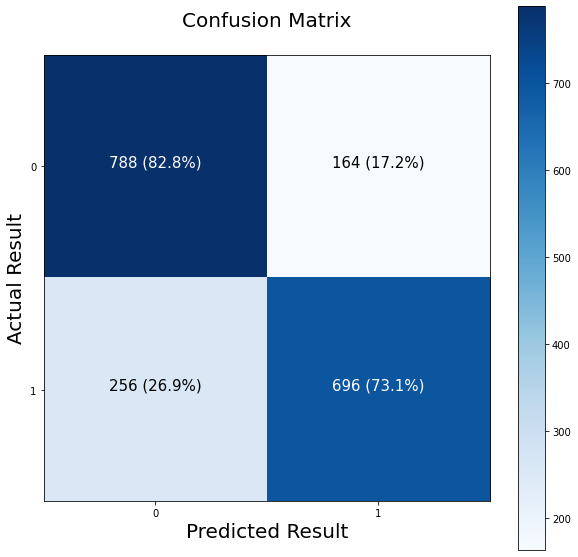

In [ ]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Result",
       ylabel="Actual Result",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
def plot_predictions(train_data=np.arange(0,len(X_train),1), 
                     train_labels=y_train, 
                     test_data=np.arange(0,len(X_test),1), 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

In [ ]:
mean_absolute_error(y_test, y_preds)

0.22058824

### Creating pre-processing function to pre process both train and test datasets

In [ ]:
def preprocess_data(dataframe):
  # Drop columns that have null values
  dataframe = dataframe.drop(['s54', 's55', 's56', 's57', 's59', "s53"], axis=1)
  # Replacing gender male and female values with 0 and 1 respectively
  dataframe = dataframe['gender'].replace({'F':1,'M':0},inplace=False)
  yes_no_columns = ['s11', 's12', 'label']
  for col in yes_no_columns:
    dataframe[col].replace({'Y': 1,'N': 0})
  dataframe = pd.get_dummies(data=dataframe, columns=["s16","s17",'s58', "s52", "s71", "s69", "s52","s18", "s70"])
  cols_to_scale = ["n1","n2","n3","n5","n6","n7","n8","n9","n10","n11","n12","n13","n14","n15"]
  scaler = MinMaxScaler()
  dataframe[cols_to_scale] = scaler.fit_transform(dataframe[cols_to_scale])

  return dataframe

### Importing and analyzing test dataset

In [ ]:
test_data = pd.read_csv("./input/test.csv")
test_data.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,M,Y,Y,1,B,D,D,0,l,...,0.026301,-9.200175,2.122970,6.646617,4.801224,1.693087,0,0,0.439270,2
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,M,Y,Y,1,B,C,B,1,l,...,0.010774,-8.897092,1.770889,11.046294,6.407230,1.516728,0,0,0.084334,4
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,M,Y,N,1,B,D,B,1,l,...,0.016837,-9.173660,1.871872,2.805834,5.481219,1.788823,0,0,0.984210,0
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,M,Y,Y,1,D,D,B,0,1,...,0.015684,-9.178200,1.675028,6.354938,5.427266,1.792147,0,0,0.003492,1
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,M,Y,Y,1,D,C,B,1,1,...,0.006406,-8.726633,1.963535,6.810158,11.487845,1.880992,0,0,0.060614,0


In [ ]:
test_data.dtypes

id         object
gender     object
s11        object
s12        object
s13         int64
s16        object
s17        object
s18        object
s48         int64
s52        object
s53        object
s54        object
s55        object
s56       float64
s57       float64
s58        object
s59       float64
s69        object
s70        object
s71        object
n1        float64
n2        float64
n3          int64
n4        float64
n5        float64
n6        float64
n7        float64
n8        float64
n9        float64
n10       float64
n11       float64
n12         int64
n13         int64
n14       float64
n15         int64
dtype: object

In [ ]:
# s54, s55, s56, s57, s59
test_data = test_data.drop(['s54', 's55', 's56', 's57', 's59', "s53"], axis=1)
test_data.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,M,Y,Y,1,B,D,D,0,l,...,0.026301,-9.200175,2.122970,6.646617,4.801224,1.693087,0,0,0.439270,2
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,M,Y,Y,1,B,C,B,1,l,...,0.010774,-8.897092,1.770889,11.046294,6.407230,1.516728,0,0,0.084334,4
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,M,Y,N,1,B,D,B,1,l,...,0.016837,-9.173660,1.871872,2.805834,5.481219,1.788823,0,0,0.984210,0
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,M,Y,Y,1,D,D,B,0,1,...,0.015684,-9.178200,1.675028,6.354938,5.427266,1.792147,0,0,0.003492,1
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,M,Y,Y,1,D,C,B,1,1,...,0.006406,-8.726633,1.963535,6.810158,11.487845,1.880992,0,0,0.060614,0


In [ ]:
test_data = pd.get_dummies(data=test_data,columns=["s16","s17",'s58', "s52", "s71", "s69", "s52","s18", "s70"])
test_data.head()

,id,gender,s11,s12,s13,s48,n1,n2,n3,n4,...,s52_l,s52_o,s18_A,s18_B,s18_C,s18_D,s70_op: A,s70_op: B,s70_op: C,s70_op: D
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,M,Y,Y,1,0,17.362752,2.985283,3,2.052415,...,1,0,0,0,0,1,0,0,0,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,M,Y,Y,1,1,15.892228,2.389056,7,6.928142,...,1,0,0,1,0,0,0,0,1,0
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,M,Y,N,1,1,10.893303,1.470903,6,2.210629,...,1,0,0,1,0,0,0,0,0,1
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,M,Y,Y,1,0,9.876850,1.442493,3,2.350379,...,0,0,0,1,0,0,0,0,0,1
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,M,Y,Y,1,1,11.674406,2.544719,8,8.136887,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
test_data.dtypes

id            object
gender        object
s11           object
s12           object
s13            int64
s48            int64
n1           float64
n2           float64
n3             int64
n4           float64
n5           float64
n6           float64
n7           float64
n8           float64
n9           float64
n10          float64
n11          float64
n12            int64
n13            int64
n14          float64
n15            int64
s16_A          uint8
s16_B          uint8
s16_C          uint8
s16_D          uint8
s17_A          uint8
s17_B          uint8
s17_C          uint8
s17_D          uint8
s58_A          uint8
s58_B          uint8
s52_0          uint8
s52_1          uint8
s52_l          uint8
s52_o          uint8
s71_a          uint8
s71_b          uint8
s71_c          uint8
s71_d          uint8
s69_0          uint8
s69_C`         uint8
s69_x          uint8
s69_~1         uint8
s52_0          uint8
s52_1          uint8
s52_l          uint8
s52_o          uint8
s18_A        

In [ ]:
test_data['gender'] = test_data['gender'].replace({'F':1, 'M':0})

In [ ]:
test_data.head()

,id,gender,s11,s12,s13,s48,n1,n2,n3,n4,...,s52_l,s52_o,s18_A,s18_B,s18_C,s18_D,s70_op: A,s70_op: B,s70_op: C,s70_op: D
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,0,Y,Y,1,0,17.362752,2.985283,3,2.052415,...,1,0,0,0,0,1,0,0,0,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,0,Y,Y,1,1,15.892228,2.389056,7,6.928142,...,1,0,0,1,0,0,0,0,1,0
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,0,Y,N,1,1,10.893303,1.470903,6,2.210629,...,1,0,0,1,0,0,0,0,0,1
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,0,Y,Y,1,0,9.876850,1.442493,3,2.350379,...,0,0,0,1,0,0,0,0,0,1
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,0,Y,Y,1,1,11.674406,2.544719,8,8.136887,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
y_and_n_columns = ['s11', 's12']

for col in y_and_n_columns:
  test_data[col] = test_data[col].replace({'Y': 1,'N': 0})

In [ ]:
test_data

,id,gender,s11,s12,s13,s48,n1,n2,n3,n4,...,s52_l,s52_o,s18_A,s18_B,s18_C,s18_D,s70_op: A,s70_op: B,s70_op: C,s70_op: D
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,0,1,1,1,0,17.362752,2.985283,3,2.052415,...,1,0,0,0,0,1,0,0,0,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,0,1,1,1,1,15.892228,2.389056,7,6.928142,...,1,0,0,1,0,0,0,0,1,0
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,0,1,0,1,1,10.893303,1.470903,6,2.210629,...,1,0,0,1,0,0,0,0,0,1
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,0,1,1,1,0,9.876850,1.442493,3,2.350379,...,0,0,0,1,0,0,0,0,0,1
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,0,1,1,1,1,11.674406,2.544719,8,8.136887,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85060,b'gAAAAABinOjbnJVk2-nOVQsYB9p4DK26fTLLik_UR2H0...,0,1,1,1,1,10.547381,1.452660,7,8.000085,...,1,0,0,0,1,0,0,0,1,0
85061,b'gAAAAABinOi7ixyXrlKYlx8D9i0-TIPD5elP2k-vuekn...,0,1,1,1,1,10.149117,2.168239,6,6.011115,...,1,0,0,0,1,0,0,0,1,0
85062,b'gAAAAABinOi31zWSlD0OMhbBd3_weh7Kq6aPeO4yYqns...,0,0,1,1,1,3.744380,0.661328,2,2.112016,...,0,0,0,0,1,0,1,0,0,0
85063,b'gAAAAABinOjIe7jFVk9k7jiH8Y3rdpUHDTZG2T2isunp...,0,0,1,1,1,10.194615,1.557863,2,2.433086,...,1,0,0,0,0,1,0,0,0,1


In [ ]:
test_data[cols_to_scale] = scaler.fit_transform(test_data[cols_to_scale])

In [ ]:
id_column = test_data.id
test_data = test_data.drop('id', axis='columns')

In [ ]:
test_data.head()

,gender,s11,s12,s13,s48,n1,n2,n3,n4,n5,...,s52_l,s52_o,s18_A,s18_B,s18_C,s18_D,s70_op: A,s70_op: B,s70_op: C,s70_op: D
0,0,1,1,1,0,0.806000,0.936357,0.3,2.052415,0.932772,...,1,0,0,0,0,1,0,0,0,1
1,0,1,1,1,1,0.729968,0.728708,0.7,6.928142,0.914366,...,1,0,0,1,0,0,0,0,1,0
2,0,1,0,1,1,0.471502,0.408940,0.6,2.210629,0.866861,...,1,0,0,1,0,0,0,0,0,1
3,0,1,1,1,0,0.418947,0.399045,0.3,2.350379,0.368684,...,0,0,0,1,0,0,0,0,0,1
4,0,1,1,1,1,0.511889,0.782921,0.8,8.136887,0.662619,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
X_train.shape, test_data.shape, y_train.shape, y_test.shape

((7616, 54), (85065, 54), (7616,), (1904,))

In [ ]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    tf.random.set_seed(42)
    model = keras.Sequential([
        keras.layers.Dense(54, input_dim=54, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005), loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = keras.Sequential([
        keras.layers.Dense(54, input_dim=54, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_2.fit(X_train, y_train,
                               epochs=75, # model already doing pretty good with current LR, probably don't need 100 epochs
                               callbacks=[lr_scheduler])

Epoch 1/75
238/238 [==============================] - 1s 2ms/step - loss: 0.4931 - accuracy: 0.7705 - lr: 0.0010
Epoch 2/75
238/238 [==============================] - 1s 2ms/step - loss: 0.4599 - accuracy: 0.7915 - lr: 0.0011
Epoch 3/75
238/238 [==============================] - 1s 2ms/step - loss: 0.4535 - accuracy: 0.7928 - lr: 0.0013
Epoch 4/75
238/238 [==============================] - 1s 2ms/step - loss: 0.4516 - accuracy: 0.7924 - lr: 0.0014
Epoch 5/75
238/238 [==============================] - 1s 2ms/step - loss: 0.4511 - accuracy: 0.7915 - lr: 0.0016
Epoch 6/75
238/238 [==============================] - 1s 2ms/step - loss: 0.4530 - accuracy: 0.7939 - lr: 0.0018
Epoch 7/75
238/238 [==============================] - 1s 2ms/step - loss: 0.4492 - accuracy: 0.7992 - lr: 0.0020
Epoch 8/75
238/238 [==============================] - 1s 2ms/step - loss: 0.4549 - accuracy: 0.7945 - lr: 0.0022
Epoch 9/75
238/238 [==============================] - 1s 2ms/step - loss: 0.4476 - accuracy: 0.7

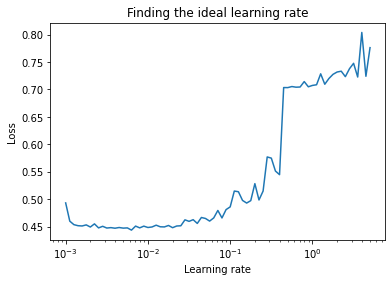

In [ ]:
lrs = 1e-3 * (10**(np.arange(75)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

So from the following graph we can see that the ideal learning rate is actually the default learning rate which is 0.001

In [ ]:
def ANN_2(X_train, y_train, X_test, y_test, loss, weights):
    tf.random.set_seed(42)
    model = keras.Sequential([
        keras.layers.Dense(54, input_dim=54, activation='relu'),
        keras.layers.Dense(54, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0005), loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [ ]:
tf.random.set_seed(42)

# Create the model
model_2 = keras.Sequential([
        keras.layers.Dense(54, input_dim=54, activation='relu'),
        keras.layers.Dense(54, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.00075),
                 metrics=["accuracy"])

history_2 = model_2.fit(X_train, y_train,
                               epochs=100)

Epoch 1/100
238/238 [==============================] - 1s 2ms/step - loss: 0.5050 - accuracy: 0.7668
Epoch 2/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4627 - accuracy: 0.7874
Epoch 3/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4546 - accuracy: 0.7898
Epoch 4/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4498 - accuracy: 0.7960
Epoch 5/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4482 - accuracy: 0.7946
Epoch 6/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4475 - accuracy: 0.7969
Epoch 7/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4446 - accuracy: 0.7981
Epoch 8/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4462 - accuracy: 0.7942
Epoch 9/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4439 - accuracy: 0.7958
Epoch 10/100
238/238 [==============================] - 1s 2ms/step - loss: 0.4421 - accura

Text(0.5, 1.0, 'Model_2 training curves')

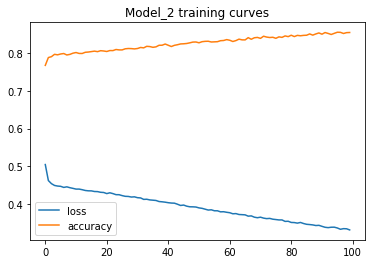

In [ ]:
# Plot the loss curves
pd.DataFrame(history_2.history).plot()
plt.title("Model_2 training curves")

In [ ]:
y_preds

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
y_preds_full = np.round(model_2.predict(test_data))

In [ ]:
y_preds_full

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
y_preds_full.shape, id_column.shape

((85065, 1), (85065,))

In [ ]:
y_preds_full.dtype

dtype('float32')

In [ ]:
y_preds_full = np.int64(y_preds_full)

In [ ]:
y_preds_full

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

### Using validation data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9)

In [ ]:
tf.random.set_seed(42)

# Create the model
model_3 = keras.Sequential([
        keras.layers.Dense(54, input_dim=54, activation='relu'),
        keras.layers.Dense(54, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

history_3 = model_2.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), validation_steps=len(X_valid))

Epoch 1/50
402/402 [==============================] - 4s 10ms/step - loss: 0.3131 - accuracy: 0.8683 - val_loss: 0.3406 - val_accuracy: 0.8578
Epoch 2/50
402/402 [==============================] - 3s 8ms/step - loss: 0.3041 - accuracy: 0.8724 - val_loss: 0.3416 - val_accuracy: 0.8564
Epoch 3/50
402/402 [==============================] - 4s 9ms/step - loss: 0.2975 - accuracy: 0.8739 - val_loss: 0.3332 - val_accuracy: 0.8585
Epoch 4/50
402/402 [==============================] - 4s 10ms/step - loss: 0.2938 - accuracy: 0.8761 - val_loss: 0.3467 - val_accuracy: 0.8543
Epoch 5/50
402/402 [==============================] - 4s 10ms/step - loss: 0.2938 - accuracy: 0.8768 - val_loss: 0.3436 - val_accuracy: 0.8522
Epoch 6/50
402/402 [==============================] - 3s 8ms/step - loss: 0.2913 - accuracy: 0.8770 - val_loss: 0.3523 - val_accuracy: 0.8557
Epoch 7/50
402/402 [==============================] - 4s 9ms/step - loss: 0.2892 - accuracy: 0.8775 - val_loss: 0.3532 - val_accuracy: 0.8480
Epo

Text(0.5, 1.0, 'Model_3 training curves')

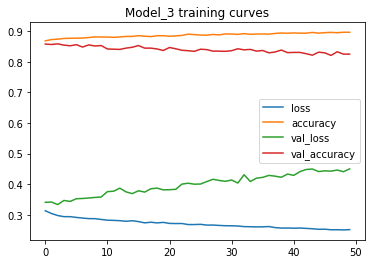

In [ ]:
# Plot the loss curves
pd.DataFrame(history_3.history).plot()
plt.title("Model_3 training curves")

In [ ]:
def ANN_3(X_train, y_train, X_valid, y_valid, X_test, y_test, loss, weights):
    tf.random.set_seed(42)
    model = keras.Sequential([
        keras.layers.Dense(54, input_dim=54, activation='relu'),
        keras.layers.Dense(54, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0005), loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), validation_steps=len(X_valid))
    else:
        history = model.fit(X_train, y_train, epochs=100, class_weight = weights, validation_data=(X_valid, y_valid), validation_steps=len(X_valid))
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = tf.round(y_preds)
    
    # Plot the loss curves
    pd.DataFrame(history.history).plot()
    plt.title("Model training curves")
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

Epoch 1/100
268/268 [==============================] - 3s 8ms/step - loss: 0.5179 - accuracy: 0.7633 - val_loss: 0.4618 - val_accuracy: 0.7941
Epoch 2/100
268/268 [==============================] - 2s 8ms/step - loss: 0.4654 - accuracy: 0.7864 - val_loss: 0.4498 - val_accuracy: 0.8036
Epoch 3/100
268/268 [==============================] - 3s 13ms/step - loss: 0.4581 - accuracy: 0.7893 - val_loss: 0.4461 - val_accuracy: 0.7962
Epoch 4/100
268/268 [==============================] - 2s 8ms/step - loss: 0.4536 - accuracy: 0.7934 - val_loss: 0.4736 - val_accuracy: 0.7805
Epoch 5/100
268/268 [==============================] - 2s 8ms/step - loss: 0.4526 - accuracy: 0.7915 - val_loss: 0.4417 - val_accuracy: 0.7973
Epoch 6/100
268/268 [==============================] - 2s 8ms/step - loss: 0.4515 - accuracy: 0.7944 - val_loss: 0.4425 - val_accuracy: 0.7983
Epoch 7/100
268/268 [==============================] - 2s 8ms/step - loss: 0.4484 - accuracy: 0.7981 - val_loss: 0.4386 - val_accuracy: 0.800

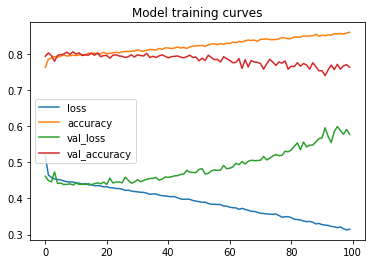

In [ ]:
y_preds= ANN_3(X_train, y_train, X_valid, y_valid, X_test, y_test, 'binary_crossentropy', -1)

> Since the training dataset is fairly small we can see that we have issue of overfitting. 

In [ ]:
mean_absolute_error(y_test,tf.round(y_preds))

0.14758404

In [ ]:
def confusion_matrix_plot(y_test, y_preds):
  import itertools

  figsize = (10, 10)

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.cast(y_preds, tf.int64))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Result",
        ylabel="Actual Result",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

In [ ]:
m

In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 54)                2970      
                                                                 
 dense_10 (Dense)            (None, 54)                2970      
                                                                 
 dense_11 (Dense)            (None, 1)                 55        
                                                                 
Total params: 5,995
Trainable params: 5,995
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9)

In [ ]:
reger_model = RandomForestRegressor(random_state=0, n_estimators=1000)
reger_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [ ]:
y_preds_reger = reger_model.predict(X_test)

In [ ]:
y_preds_reger

array([0.354, 0.966, 0.085, ..., 0.926, 0.995, 0.977])

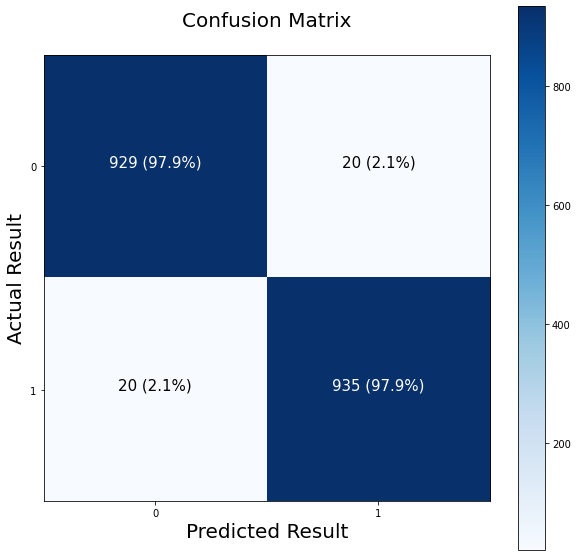

In [ ]:
confusion_matrix_plot(y_test, tf.round(y_preds_reger))

> Here a simple model is actually producing much better results without the need of any sort of tweaking to the model; since simpler model doesn't require large datasets like the deep learning neural network model we have tried previously.

In [ ]:
mean_absolute_error(y_test, tf.round(y_preds_reger))

0.02100840336134454

In [ ]:
y_preds_full_reger = reger_model.predict(test_data)

In [ ]:
y_preds_full_reger = np.round(y_preds_full_reger).astype(int)
y_preds_full_reger.dtype

dtype('int64')

In [ ]:
submission = pd.DataFrame(data = y_preds_full_reger, columns=['label'])
submission['id'] = id_column
first_column = submission.pop('id')
submission.insert(0, 'id', first_column)
submission

,id,label
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,1
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,1
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,0
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,0
...,...,...
85060,b'gAAAAABinOjbnJVk2-nOVQsYB9p4DK26fTLLik_UR2H0...,0
85061,b'gAAAAABinOi7ixyXrlKYlx8D9i0-TIPD5elP2k-vuekn...,1
85062,b'gAAAAABinOi31zWSlD0OMhbBd3_weh7Kq6aPeO4yYqns...,1
85063,b'gAAAAABinOjIe7jFVk9k7jiH8Y3rdpUHDTZG2T2isunp...,1


In [ ]:
submission.to_csv('submission.csv', index=None)

### Hyper Parameter training of RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
print(RandomForestClassifier())
print(RandomForestRegressor())

RandomForestClassifier()
RandomForestRegressor()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
reger_model_2 = RandomForestRegressor(n_estimators=500, random_state=0, max_depth=32)

In [ ]:
reger_model_2.fit(X_train,y_train)

RandomForestRegressor(max_depth=32, n_estimators=500, random_state=0)

In [ ]:
y_preds_reger_2 = reger_model_2.predict(X_test)

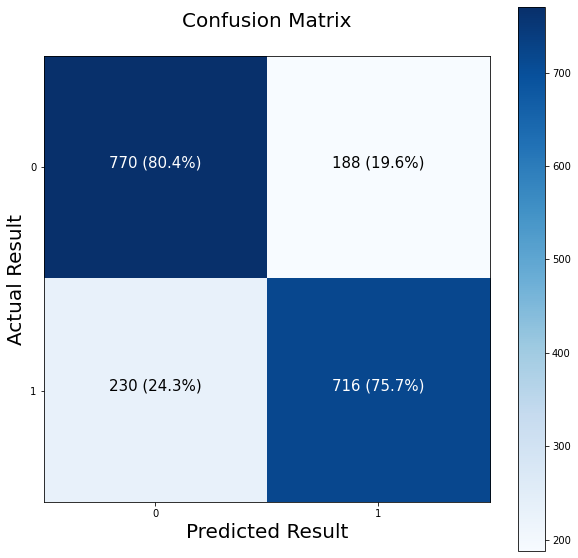

In [ ]:
confusion_matrix_plot(y_test, tf.round(y_preds_reger_2))

In [ ]:
mean_absolute_error(y_test, np.round(y_preds_reger_2).astype(int))

0.016281512605042018

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
X_train_xgb = X_train.loc[:,~X_train.columns.duplicated()].copy()
X_test_xgb = X_test.loc[:,~X_test.columns.duplicated()].copy()
xg_reg.fit(X_train_xgb,y_train)
xgb_preds = xg_reg.predict(X_test_xgb)

[17:10:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mean_absolute_error(y_test, np.round(xgb_preds))

0.19485295

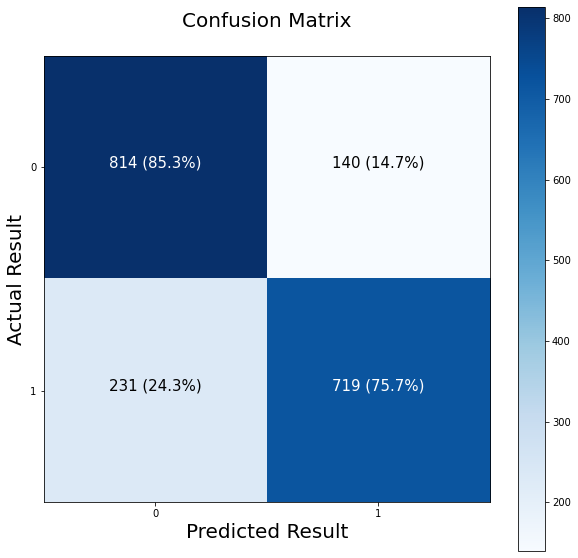

In [ ]:
confusion_matrix_plot(y_test, np.round(xgb_preds))

In [ ]:
my_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.6, objective ='reg:squarederror')
my_model.fit(X_train_xgb, y_train)

XGBRegressor(learning_rate=0.6, n_estimators=1000, objective='reg:squarederror')

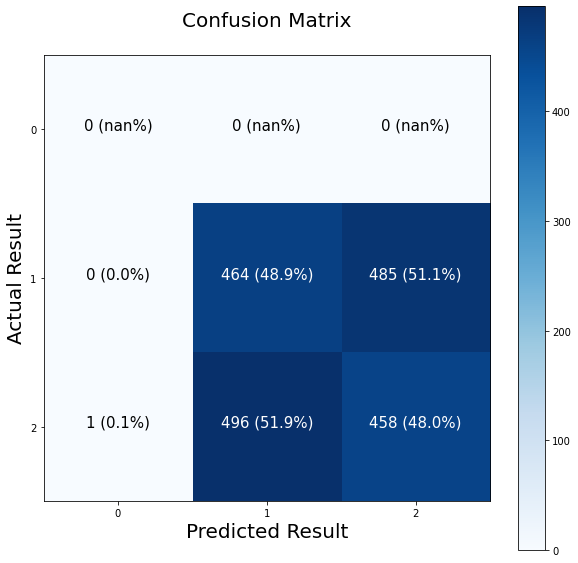

In [ ]:
y_preds_xgb = my_model.predict(X_test_xgb)
confusion_matrix_plot(y_test, tf.round(y_preds_xgb))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, random_state=42)

X_train_xgb = X_train.loc[:,~X_train.columns.duplicated()].copy()
X_test_xgb = X_test.loc[:,~X_test.columns.duplicated()].copy()
X_valid_xgb = X_valid.loc[:,~X_valid.columns.duplicated()].copy()

In [ ]:
xgb_classifier = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.5, random_state=0)
xgb_classifier.fit(X_train_xgb,y_train)

XGBClassifier(learning_rate=0.5, n_estimators=1000)

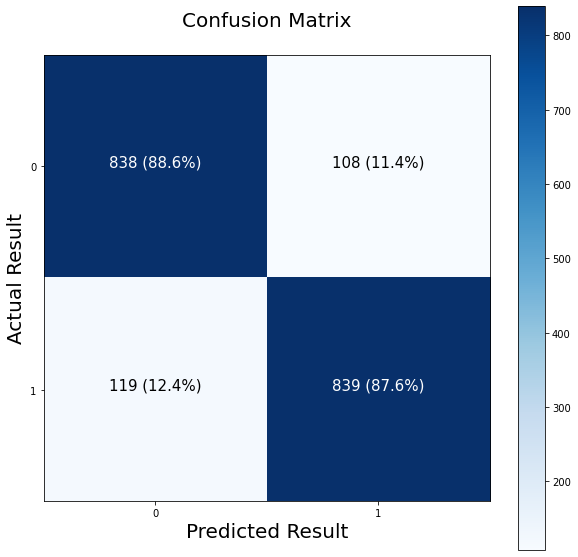

In [ ]:
y_preds_xgb_2 = xgb_classifier.predict(X_test_xgb)
confusion_matrix_plot(y_test, tf.round(y_preds_xgb_2))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9)

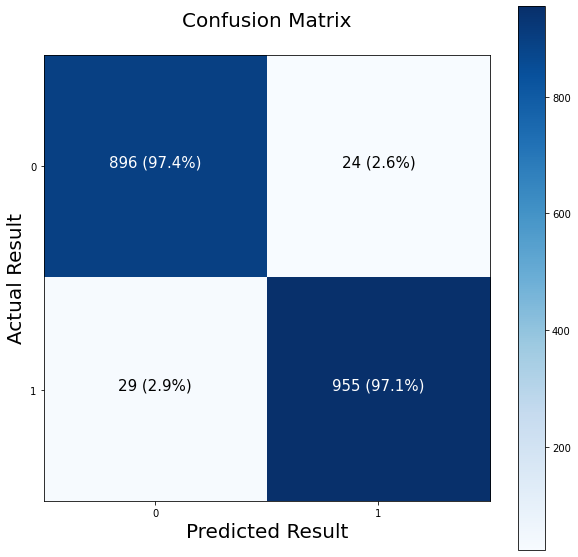

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0, splitter='random', max_features='auto')
clf = clf.fit(X_train, y_train)
y_preds_decision_tree = clf.predict(X_test)
confusion_matrix_plot(y_test,tf.round(y_preds_decision_tree))

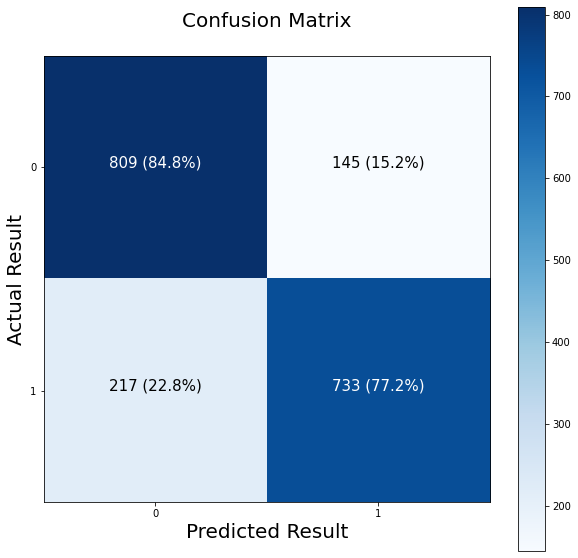

In [ ]:
y_preds_logistic_regr = logistic_regr_model.predict(X_test)
confusion_matrix_plot(y_test, tf.round(y_preds_logis))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Build Random Forest Model with hyperparameters

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf_Model = RandomForestClassifier()

### With GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4, random_state=0)

In [ ]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 20 folds for each of 10 candidates, totalling 200 fits


RandomizedSearchCV(cv=20, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=0, verbose=2)

In [ ]:
rf_RandomGrid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 70}

In [ ]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.784
Test Accuracy - : 0.794


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, random_state=42)

X_train_xgb = X_train.loc[:,~X_train.columns.duplicated()].copy()
X_test_xgb = X_test.loc[:,~X_test.columns.duplicated()].copy()
X_valid_xgb = X_valid.loc[:,~X_valid.columns.duplicated()].copy()

In [ ]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
              importance_type='gain', 
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=np.nan,
              n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1)

classifier.fit(X_train_xgb, y_train)

XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.05,
              min_child_weight=7, n_estimators=150, n_jobs=0,
              num_parallel_tree=1, tree_method='exact', validate_parameters=1)

In [ ]:
from sklearn.metrics import log_loss, accuracy_score

In [ ]:
pred = classifier.predict_proba(X_valid_xgb)
print("Validation data logloss: {}".format(log_loss(y_valid, pred)))

Validation data logloss: 0.45081380287580536


In [ ]:
pred = classifier.predict(X_valid_xgb)
accu = accuracy_score(y_valid, pred)
print("Accuracy: %.2f%%" % (accu * 100.0))

Accuracy: 79.41%
